# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration


In [6]:
df_hh_income.shape

(29322, 3)

In [7]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [8]:
df_pct_poverty.shape

(29329, 3)

In [9]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [34]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [10]:
df_pct_completed_hs.shape

(29329, 3)

In [11]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [12]:
df_share_race_city.shape

(29268, 7)

In [13]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [14]:
df_fatalities.shape

(2535, 14)

In [15]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [16]:
df_hh_income.duplicated().value_counts()

False    29322
Name: count, dtype: int64

In [17]:
df_pct_poverty.duplicated().value_counts()

False    29329
Name: count, dtype: int64

In [18]:
df_share_race_city.duplicated().value_counts()

False    29268
Name: count, dtype: int64

In [19]:
df_pct_completed_hs.duplicated().value_counts()

False    29329
Name: count, dtype: int64

In [20]:
df_fatalities.duplicated().value_counts()

False    2535
Name: count, dtype: int64

In [21]:
df_hh_income.isna().value_counts()

Geographic Area  City   Median Income
False            False  False            29271
                        True                51
Name: count, dtype: int64

In [29]:
df_hh_income = df_hh_income.dropna()

In [30]:
df_hh_income.isna().value_counts()

Geographic Area  City   Median Income
False            False  False            29271
Name: count, dtype: int64

In [23]:
df_pct_poverty.isna().value_counts()

Geographic Area  City   poverty_rate
False            False  False           29329
Name: count, dtype: int64

In [24]:
df_share_race_city.isna().value_counts()

Geographic area  City   share_white  share_black  share_native_american  share_asian  share_hispanic
False            False  False        False        False                  False        False             29268
Name: count, dtype: int64

In [25]:
df_pct_completed_hs.isna().value_counts()

Geographic Area  City   percent_completed_hs
False            False  False                   29329
Name: count, dtype: int64

In [26]:
df_fatalities.isna().value_counts()

id     name   date   manner_of_death  armed  age    gender  race   city   state  signs_of_mental_illness  threat_level  flee   body_camera
False  False  False  False            False  False  False   False  False  False  False                    False         False  False          2254
                                                            True   False  False  False                    False         False  False           136
                                                            False  False  False  False                    False         True   False            51
                                             True   False   True   False  False  False                    False         False  False            45
                                                            False  False  False  False                    False         False  False            28
                                             False  False   True   False  False  False                    False         True  

In [31]:
df_fatalities = df_fatalities.dropna()

In [32]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [37]:
df_pct_poverty = df_pct_poverty[df_pct_poverty['poverty_rate']!= '-']

In [41]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)

/var/folders/qw/syy1_jjd4kn87h86k1xd4hf40000gn/T/ipykernel_21596/3438909377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(float)


In [42]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29128 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29128 non-null  object 
 1   City             29128 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.2+ KB


In [43]:
df_pct_poverty_by_state = df_pct_poverty.groupby('Geographic Area', as_index = False).agg(avg_poverty_pct = ('poverty_rate', 'mean'))



In [59]:
h_bar = px.bar(y = df_pct_poverty_by_state['Geographic Area'],
               x = df_pct_poverty_by_state.avg_poverty_pct,
               orientation='h',
              title='Avg. Poverty Rate by State')

h_bar.update_layout(xaxis_title='Avg Poverty Rate', yaxis_title='State', coloraxis_showscale=False )
h_bar.update_yaxes(categoryorder='total ascending', tickfont=dict(size=5))
# # h_bar.update_xaxes(tickfont=dict(size=15))

h_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [49]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [51]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs']!= '-']

In [52]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(float)

In [54]:
df_pct_completed_hs_by_state = df_pct_completed_hs.groupby('Geographic Area', as_index = False).agg(avg_completed_hs_rate = ('percent_completed_hs', 'mean'))


In [58]:
h_bar = px.bar(y = df_pct_completed_hs_by_state['Geographic Area'],
               x = df_pct_completed_hs_by_state.avg_completed_hs_rate,
               orientation='h',
              title='Avg. High School Completion Rate by State')

h_bar.update_layout(xaxis_title='Avg High School Completion Pct', yaxis_title='State', coloraxis_showscale=False )
h_bar.update_yaxes(categoryorder='total descending', tickfont=dict(size=5))
# # h_bar.update_xaxes(tickfont=dict(size=15))

h_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [60]:
poverty_hs_graduation = pd.merge(df_pct_poverty, df_pct_completed_hs, on = ['Geographic Area', 'City'])

In [61]:
poverty_hs_graduation.head()

,Geographic Area,City,poverty_rate,percent_completed_hs
0,AL,Abanda CDP,78.80,21.20
1,AL,Abbeville city,29.10,69.10
2,AL,Adamsville city,25.50,78.90
3,AL,Addison town,30.70,81.40
4,AL,Akron town,42.00,68.60


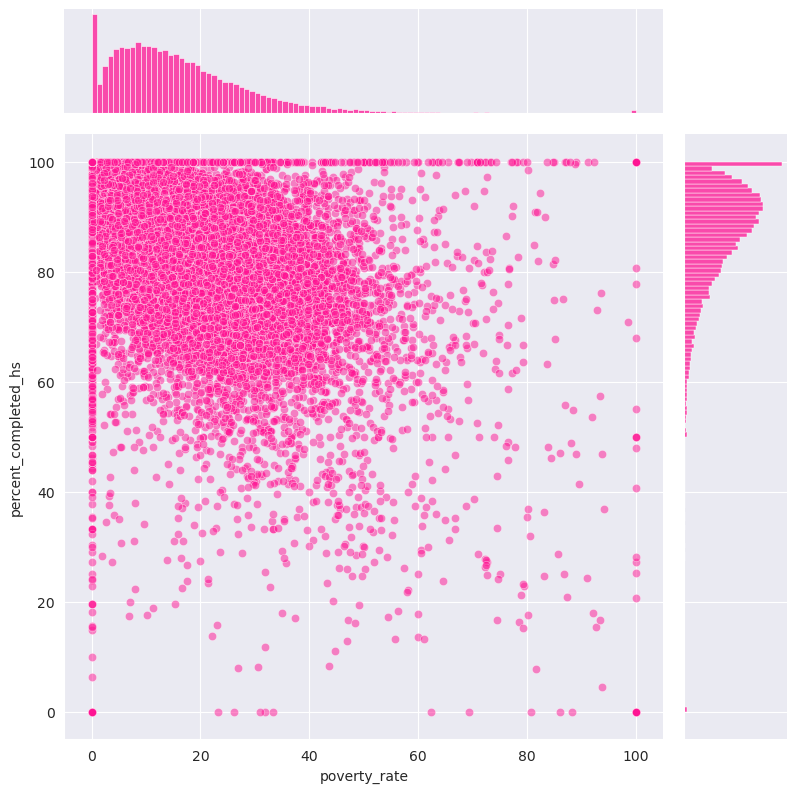

In [62]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=poverty_hs_graduation['poverty_rate'], 
                y=poverty_hs_graduation['percent_completed_hs'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

/Users/zhenfan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



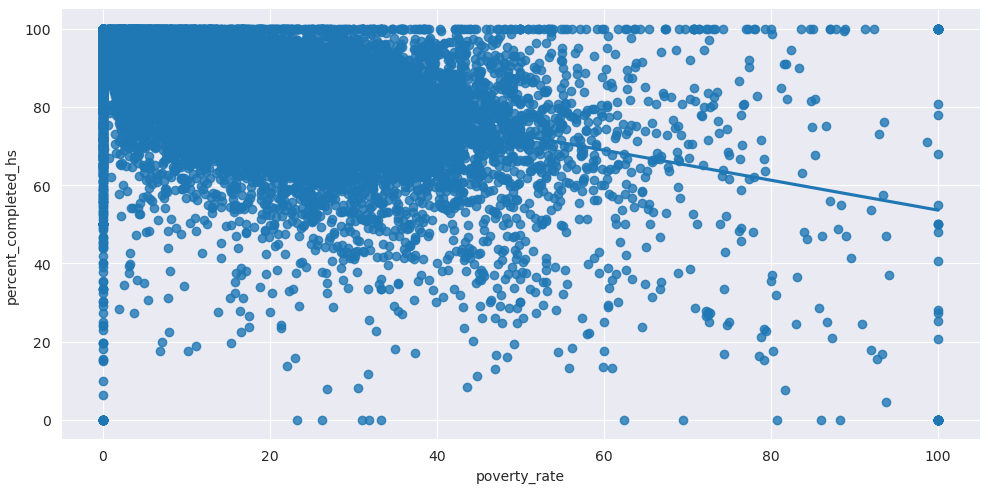

In [63]:
with sns.axes_style('darkgrid'):
    sns.lmplot(
        data=poverty_hs_graduation, x="poverty_rate", y="percent_completed_hs",
        lowess = True, aspect=2,
    )
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [66]:
df_share_race_city.columns[2:]

Index(['share_white', 'share_black', 'share_native_american', 'share_asian',
       'share_hispanic'],
      dtype='object')

In [67]:
for col in df_share_race_city.columns[2:]:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

In [68]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [70]:
df_share_race_city_by_state = df_share_race_city.groupby('Geographic area', as_index = False).agg(avg_share_white = ('share_white', 'mean'), avg_share_black = ('share_black', 'mean'), avg_share_native_american = ('share_native_american', 'mean'), avg_share_asian = ('share_asian', 'mean'), avg_share_hispanic = ("share_hispanic", 'mean'))


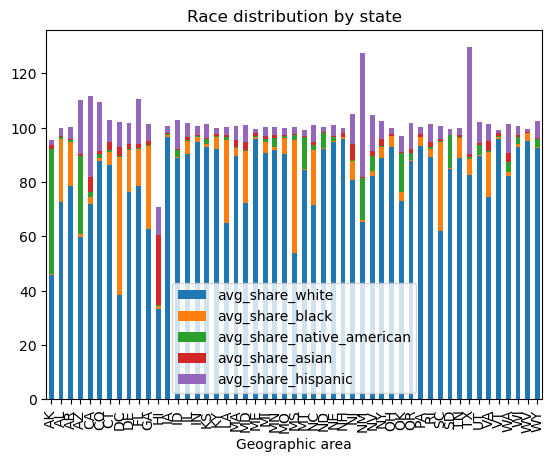

In [72]:
df_share_race_city_by_state.plot(x='Geographic area', kind='bar', stacked=True,
        title='Race distribution by state')
plt.show()

In [73]:
fig = px.bar(df_share_race_city_by_state, x="Geographic area", y=['avg_share_white', 'avg_share_black', 'avg_share_native_american', 'avg_share_asian', 'avg_share_hispanic'], title="Race distribution by state")
fig.show()

In [74]:
df_share_race_city[df_share_race_city['Geographic area'] == 'HI']

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
5672,HI,Ahuimanu CDP,22.00,0.70,0.10,31.10,9.40
5673,HI,Aiea CDP,15.00,0.70,0.10,57.70,6.20
5674,HI,Ainaloa CDP,28.80,0.60,0.50,14.40,19.00
5675,HI,Anahola CDP,17.30,0.20,0.60,6.40,9.80
5676,HI,Captain Cook CDP,31.40,0.70,0.40,27.60,9.50
...,...,...,...,...,...,...,...
5818,HI,Waipio CDP,11.60,1.50,0.20,56.40,8.70
5819,HI,Waipio Acres CDP,19.10,3.30,0.40,35.40,13.40
5820,HI,West Loch Estate CDP,13.70,1.70,0.20,55.00,8.40
5821,HI,Wheeler AFB CDP,68.20,9.70,1.00,3.50,17.20


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [75]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [77]:
d_by_race = df_fatalities.race.value_counts()

In [78]:
fig = px.pie(d_by_race, values= d_by_race.values, names=d_by_race.index , title='Death by Race', hole = .6)
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [79]:
d_by_gender = df_fatalities.gender.value_counts()

In [80]:
fig = px.pie(d_by_gender, values= d_by_gender.values, names=d_by_gender.index , title='Death by Gender', hole = .6)
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

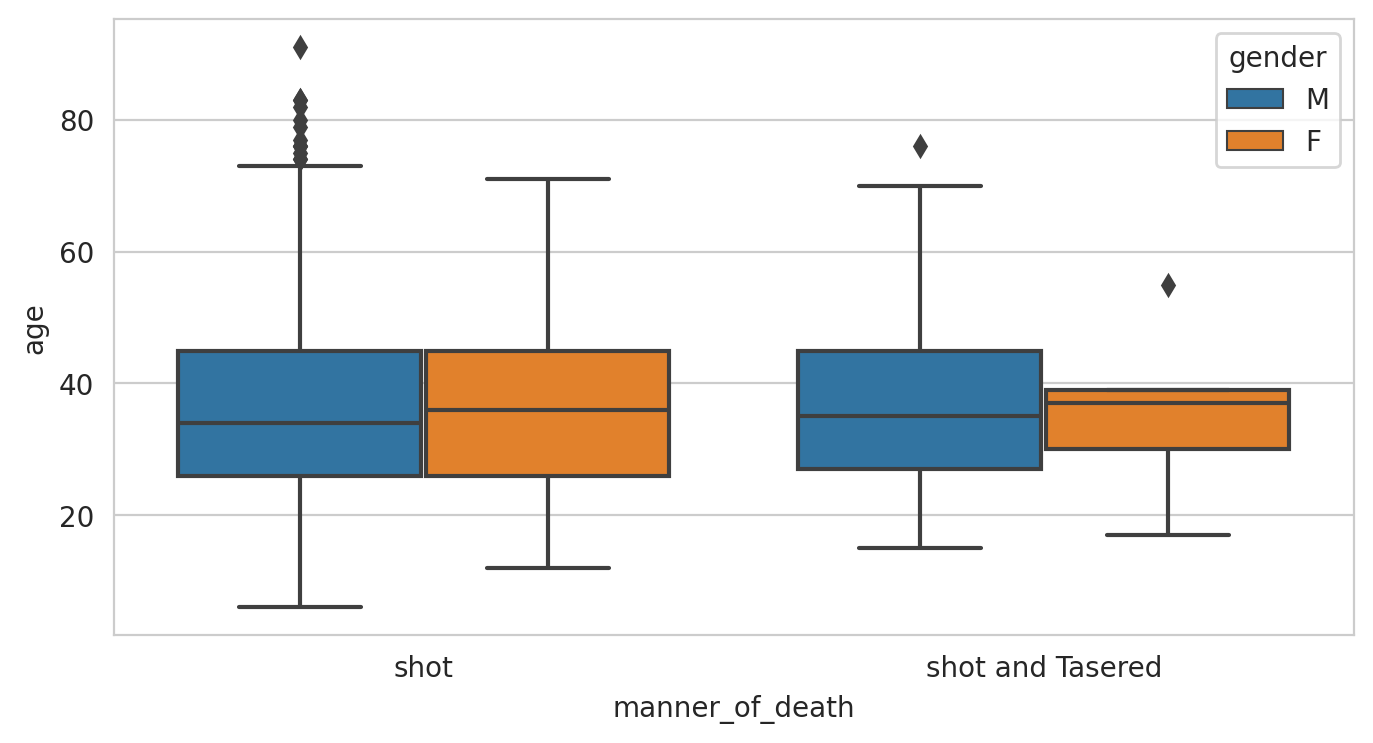

In [82]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_fatalities,
                x='manner_of_death',
                y='age',
               hue = 'gender')
 
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [83]:
d_by_arm = df_fatalities.armed.value_counts()

In [92]:
fig = px.pie(d_by_arm, values= d_by_arm.values, names=d_by_arm.index , title='Death by Armed', hole = .6)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [93]:
df_fatalities['age>25'] = np.where(df_fatalities.age >= 25, 1, 0) 

In [94]:
df_fatalities['age>25'].value_counts()

age>25
1    1832
0     422
Name: count, dtype: int64

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<Axes: xlabel='age', ylabel='Count'>

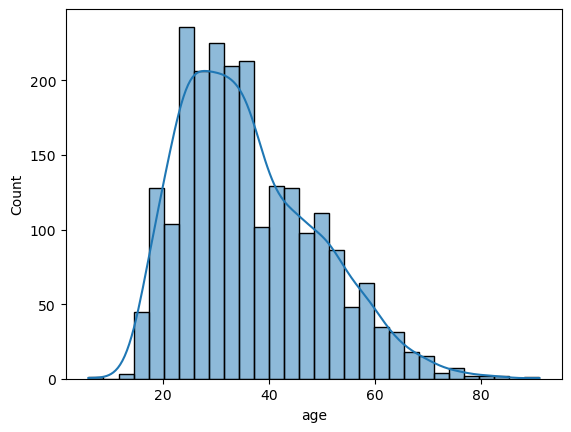

In [97]:
sns.histplot(data=df_fatalities, x="age", kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<Axes: xlabel='age', ylabel='Density'>

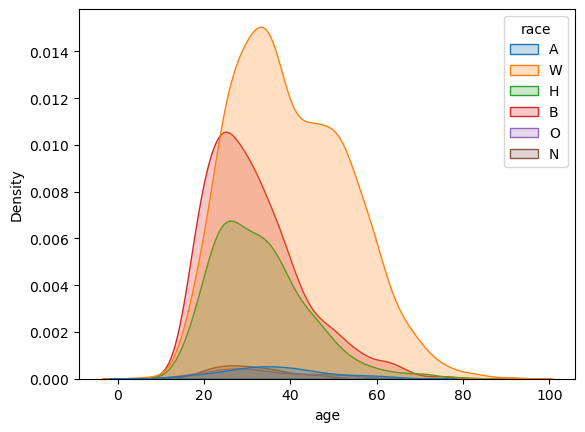

In [103]:
sns.kdeplot(data=df_fatalities, x="age",hue='race', fill=True)

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [107]:
d_by_mental_illness = df_fatalities.signs_of_mental_illness.value_counts()

In [116]:
fig = px.pie(d_by_mental_illness, values= d_by_mental_illness.values, names=d_by_mental_illness.index , title='Death by Mental Illness', hole = .6)

fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [137]:
death_by_state_city = df_fatalities.groupby(['state', 'city'], as_index = False).agg(death_ct = ('id', 'count'))

In [139]:
death_by_state_city.sort_values('death_ct', ascending = False, inplace = True)

In [161]:
death_by_state_city_10 = death_by_state_city[:10]

In [143]:
h_bar = px.bar(y = death_by_state_city_10.city,
               x = death_by_state_city_10.death_ct,
               orientation='h',
              title='Top 10 city with fatal death')

h_bar.update_layout(xaxis_title='#Death', yaxis_title='City', coloraxis_showscale=False )
h_bar.update_yaxes(categoryorder='total ascending')
h_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [164]:
death_by_state_city_10['city_name'] = death_by_state_city_10.city+' city'

/var/folders/qw/syy1_jjd4kn87h86k1xd4hf40000gn/T/ipykernel_21596/717050312.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [188]:
death_city_race = df_share_race_city.merge(death_by_state_city_10, left_on = ['Geographic area','City'], right_on = ['state','city_name'])

In [179]:
df_fatalities_top_10 = df_fatalities.merge(death_by_state_city_10, left_on = ['state','city'], right_on = ['state','city'])

In [180]:
df_fatalities_top_10_by_race = df_fatalities_top_10.groupby(['state', 'city', 'race'], as_index = False).agg(death_ct = ('id', 'count'))

In [182]:
df_fatalities_top_10_race_pct = pd.merge(df_fatalities_top_10_by_race, death_by_state_city_10, on = 'city')

In [184]:
df_fatalities_top_10_race_pct['pct'] = df_fatalities_top_10_race_pct.death_ct_x/df_fatalities_top_10_race_pct.death_ct_y

In [186]:
df_fatalities_top_10_race_pct = df_fatalities_top_10_race_pct.pivot(index='city', columns='race', values='pct').reset_index()


In [191]:
death_city_race_comb = death_city_race.merge(df_fatalities_top_10_race_pct, on = 'city')

In [194]:
death_city_race_comb['white_index'] = death_city_race_comb.W*100/death_city_race_comb.share_white
death_city_race_comb['black_index'] = death_city_race_comb.B*100/death_city_race_comb.share_black
death_city_race_comb['native_american_index'] = death_city_race_comb.N*100/death_city_race_comb.share_native_american
death_city_race_comb['asian_index'] = death_city_race_comb.A*100/death_city_race_comb.share_asian
death_city_race_comb['hispanic_index'] = death_city_race_comb.H*100/death_city_race_comb.share_hispanic

In [195]:
death_city_race_comb

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,state,city,death_ct,...,B,H,N,O,W,white_index,black_index,native_american_index,asian_index,hispanic_index
0,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80,AZ,Phoenix,28,...,0.07,0.39,0.11,NaN,0.43,0.65,1.10,4.87,NaN,0.96
1,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50,CA,Los Angeles,35,...,0.29,0.51,NaN,NaN,0.17,0.34,2.98,NaN,0.25,1.06
2,IL,Chicago city,45.00,32.90,0.50,5.50,28.90,IL,Chicago,22,...,0.86,0.05,NaN,NaN,0.09,0.20,2.63,NaN,NaN,0.16
3,IN,Indianapolis city,62.00,27.30,0.30,2.10,9.40,IN,Indianapolis,14,...,0.64,NaN,NaN,NaN,0.36,0.58,2.35,NaN,NaN,NaN
4,MO,St. Louis city,43.90,49.20,0.30,2.90,3.50,MO,St. Louis,14,...,0.79,NaN,NaN,NaN,0.21,0.49,1.60,NaN,NaN,NaN
5,NV,Las Vegas city,62.10,11.10,0.70,6.10,31.50,NV,Las Vegas,17,...,0.18,0.29,NaN,NaN,0.53,0.85,1.59,NaN,NaN,0.93
6,OH,Columbus city,61.50,28.00,0.30,4.10,5.60,OH,Columbus,14,...,0.57,NaN,NaN,0.07,0.36,0.58,2.04,NaN,NaN,NaN
7,TX,Austin city,68.30,8.10,0.90,6.30,35.10,TX,Austin,16,...,0.19,0.12,NaN,NaN,0.69,1.01,2.31,NaN,NaN,0.36
8,TX,Houston city,50.50,23.70,0.70,6.00,43.80,TX,Houston,23,...,0.61,0.22,NaN,NaN,0.13,0.26,2.57,NaN,0.72,0.50
9,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20,TX,San Antonio,15,...,0.13,0.73,NaN,NaN,0.13,0.18,1.93,NaN,NaN,1.16


<Axes: xlabel='city'>

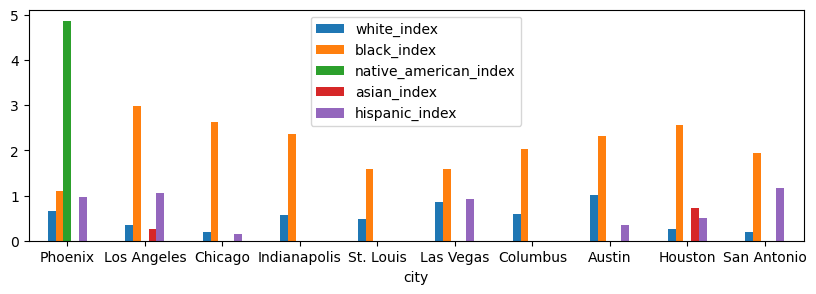

In [198]:
death_city_race_comb.plot(x="city", y=["white_index", "black_index", "native_american_index", 'asian_index', 'hispanic_index'], kind="bar", rot=0, figsize=(10,3))




# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [203]:
d_by_state = df_fatalities.groupby(['state'], as_index = False).agg(death_ct = ('id', 'count'))

In [213]:
fig = px.choropleth(df_pct_poverty_by_state, locations= 'Geographic Area',locationmode="USA-states",
                    color= 'avg_poverty_pct', 
                    hover_name='Geographic Area',scope="usa",
                    color_continuous_scale= px.colors.sequential.matter,
                   title = 'Poverty by State')
fig.show()

In [211]:
fig = px.choropleth(d_by_state, locations= 'state',locationmode="USA-states",
                    color= 'death_ct', 
                    hover_name='state',scope="usa",
                    color_continuous_scale= px.colors.sequential.matter,
                   title = 'Death by State')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [218]:
date_index = pd.DatetimeIndex(df_fatalities.date)
df_fatalities['date_index_month'] = date_index.month

In [220]:
death_by_month = df_fatalities.groupby(['date_index_month'], as_index = False).agg(death_ct = ('id', 'count'))

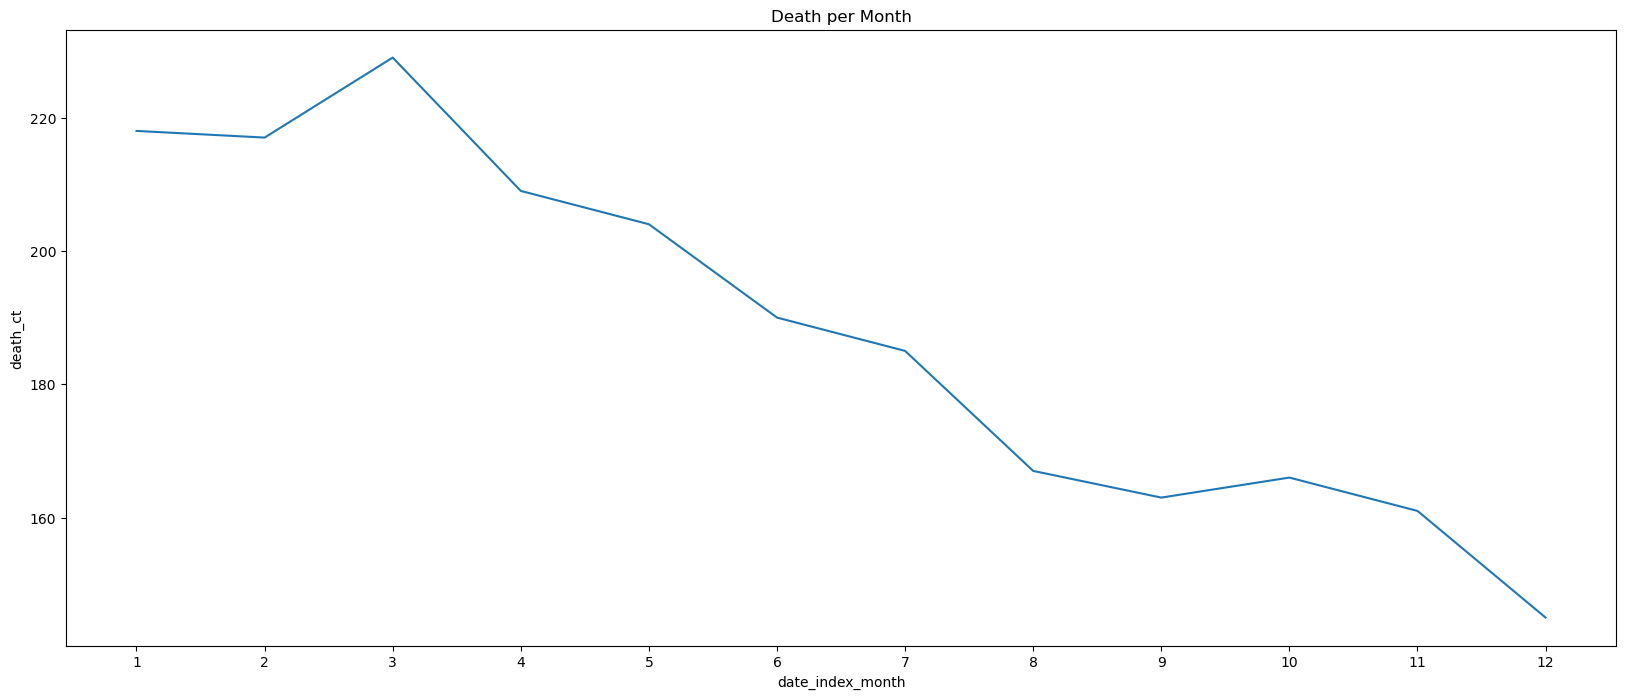

In [221]:
plt.figure(figsize = (20,8))
pl = sns.lineplot(data = death_by_month, x="date_index_month", y="death_ct")
pl.set(xticks=death_by_month.date_index_month.values)
plt.title('Death per Month')
plt.show()